In [21]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D, Flatten, AveragePooling2D
from keras import Sequential
from keras.datasets import mnist    
from tensorflow.keras.models import Sequential, Model
import os
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# mkdir -p ~/.keras/datasets
# curl -o ~/.keras/datasets/mnist.npz https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [14]:
model=Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary(  )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#train model on mnist dataset

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9160 - loss: 0.2814 - val_accuracy: 0.9601 - val_loss: 0.1316
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9706 - loss: 0.0949 - val_accuracy: 0.9781 - val_loss: 0.0677
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9804 - loss: 0.0647 - val_accuracy: 0.9801 - val_loss: 0.0589
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9835 - loss: 0.0519 - val_accuracy: 0.9840 - val_loss: 0.0524
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9844 - val_loss: 0.0509


In [17]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 950us/step - accuracy: 0.9844 - loss: 0.0509

Test accuracy: 0.9843999743461609


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


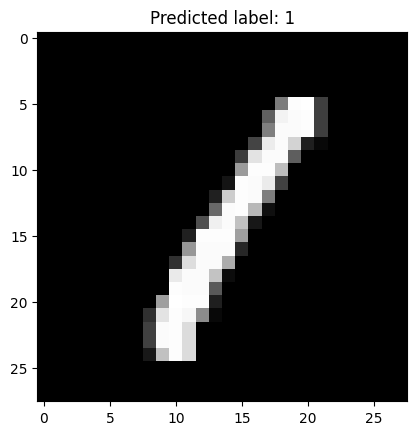

In [18]:
plt.imshow(x_train[3], cmap='gray')
plt.title(f'Predicted label: {model.predict(x_train[3].reshape(1, 28, 28, 1)).argmax()}')
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,280 (520.63 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,854 (347.09 KB)

Original Input Image (Digit: 4)


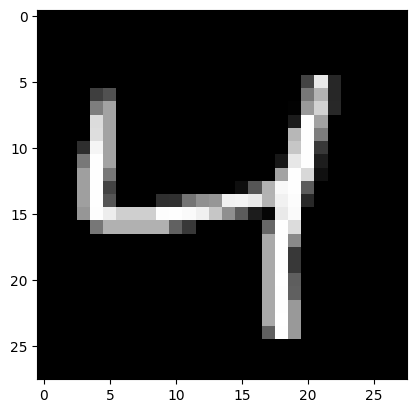

AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [25]:




# You can uncomment the next line to verify the model is built and see its structure.
model.summary()

# --- Step 2: Prepare the input image for visualization ---
# We still use the 3rd image (index 2), normalized and with a batch dimension.
img_to_visualize = np.expand_dims(x_train[2], axis=0)

# Display the original image
print("Original Input Image (Digit: 4)")
plt.imshow(img_to_visualize.squeeze(), cmap='gray')
plt.grid(False)
plt.show()

# --- Step 3: Create the visualization model ---
# This will now work because model.input is defined.
layer_outputs = [layer.output for layer in model.layers]
visualization_model = Model(inputs=model.input, outputs=layer_outputs)

# --- Step 4: Get the feature maps by running a prediction ---
feature_maps = visualization_model.predict(img_to_visualize)

# --- Step 5: Plot the outputs of each layer ---
layer_names = [layer.name for layer in model.layers]

for layer_name, f_map in zip(layer_names, feature_maps):
    # Only visualize the 2D layers (Conv2D and AveragePooling2D)
    if len(f_map.shape) == 4:
        num_filters = f_map.shape[-1]  # Number of filters in the feature map
        size = f_map.shape[1]         # Width/height of the feature map

        # Create a display grid to plot all the filters side-by-side
        display_grid = np.zeros((size, size * num_filters))

        # Post-process each filter's output for better visualization
        for i in range(num_filters):
            # Get the filter's activation map
            x = f_map[0, :, :, i]
            # Normalize the filter for better contrast
            x -= x.mean()
            if x.std() > 0:
                x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # Add the filter's image to the display grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid of feature maps
        scale = 20. / num_filters
        plt.figure(figsize=(scale * num_filters, scale))
        plt.title(f"Activations for layer: {layer_name}")
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()